In [1]:
import os
import re
import pdfplumber
import pandas as pd
import pycountry

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
OUTPUT_CSV = os.path.join(PDF_DIR, "mainfile.csv")
# ────────────────────────────────────────────────────────────────────────────────

# 1) Tech-area keywords (including Defense/Defence, Vaccine(s), Agriculture, Water)
AREA_KEYWORDS = [
    "Digital Public Infrastructure", "Digital Identity", "Digital Payments",
    "E-Governance", "E-Health", "E-Education", "E-Commerce",
    "Cloud Computing", "Edge Computing", "Data Analytics", "Big Data",
    "Artificial Intelligence", "AI", "Machine Learning", "Deep Learning",
    "Neural Network", "Computer Vision", "Natural Language Processing",
    "Robotics", "Autonomous Vehicle", "Drone", "UAV", "Internet of Things", "IoT",
    "5G", "6G", "Quantum Computing", "Quantum Communication",
    "Blockchain", "Distributed Ledger", "Fintech", "API", "Digital Twin",
    "Smart Contract", "Clean Tech", "Green Hydrogen", "Renewable Energy",
    "Wind Energy", "Solar Alliance", "Bio-energy", "3D Printing",
    "Semiconductor", "Nanotechnology", "Photonics", "Supercomputing",
    "Augmented Reality", "Virtual Reality", "Mixed Reality",
    "Cyber Security", "Data Protection", "Space", "Outer Space",
    # Agriculture & Water
    "Agriculture", "Agri-technology", "Water", "Water Resources",
    "Water Management", "Irrigation",
    # Health / Pharma
    "Vaccine", "Vaccines",
]
AREA_PATTERNS = [
    re.compile(r"\b" + re.escape(kw).replace(r"\ ", r"\s*") + r"\b", re.IGNORECASE)
    for kw in AREA_KEYWORDS
]

# 2) Build list of country names (excluding India)
COUNTRIES = [country.name for country in pycountry.countries if country.name.lower() != "india"]
# Add common names and official names if needed
for country in pycountry.countries:
    if hasattr(country, 'official_name'):
        COUNTRIES.append(country.official_name)
COUNTRY_PATTERNS = [
    (country, re.compile(r"\b" + re.escape(country) + r"\b", re.IGNORECASE))
    for country in set(COUNTRIES)
]

def extract_country_by_text(text):
    """Find the first occurring country name (other than India) in the text."""
    earliest = None
    found_country = None
    for country, pattern in COUNTRY_PATTERNS:
        match = pattern.search(text)
        if match:
            idx = match.start()
            if earliest is None or idx < earliest:
                earliest = idx
                found_country = country
    return found_country or "Unknown"

def extract_areas(pdf_path):
    """Return list of {'Country','Area of Cooperation'} for this PDF."""
    # Extract full text
    with pdfplumber.open(pdf_path) as pdf:
        full_text = "\n".join(page.extract_text() or "" for page in pdf.pages)
    # Determine country by scanning text
    country = extract_country_by_text(full_text)
    rows = []
    # Split into paragraphs
    for para in re.split(r"\n{2,}", full_text):
        if not para.strip():
            continue
        for pat, kw in zip(AREA_PATTERNS, AREA_KEYWORDS):
            if pat.search(para):
                rows.append({
                    "Country": country,
                    "Area of Cooperation": kw
                })
    return rows

def main():
    all_rows = []
    for fname in os.listdir(PDF_DIR):
        if not fname.lower().endswith(".pdf"):
            continue
        path = os.path.join(PDF_DIR, fname)
        try:
            hits = extract_areas(path)
            print(f"{fname} → {len(hits)} area(s), Country: {hits[0]['Country'] if hits else 'None'}")
            all_rows.extend(hits)
        except Exception as e:
            print(f"⚠️ Error on {fname}: {e}")

    # Dedupe and save
    df = pd.DataFrame(all_rows).drop_duplicates()
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Extracted {len(df)} unique Country–Area rows to:\n   {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


2._Bilateral_Brief_India_Paraguay_-_May_2025.pdf → 2 area(s), Country: Paraguay
2024_India-Bahrain-Bilateral.pdf → 7 area(s), Country: Bahrain
Andorra_Bilateral_Dec_2022_Nov.pdf → 0 area(s), Country: None
ArgentinajuneBB.pdf → 4 area(s), Country: Argentina
Aus-brief-2023.pdf → 8 area(s), Country: Australia
Bahamas.pdf → 1 area(s), Country: Bahamas
Belgiumnov22.pdf → 9 area(s), Country: Belgium
Bilat-Brief-July-2024.pdf → 6 area(s), Country: Kazakhstan
Bilateral-13-03-2025.pdf → 3 area(s), Country: New Zealand
Bilateral-Brief-Lesotho-for-XPD-June-2024.pdf → 3 area(s), Country: Lesotho
Bilateral-Brief-Updated_21-August-2023.pdf → 2 area(s), Country: China
Bilateral-Briefs.pdf → 5 area(s), Country: Iraq
Bilateral-brief_SA-for-XPD-June-2024.pdf → 4 area(s), Country: South Africa
Bilateral.pdf → 3 area(s), Country: Maldives
Bilateral_brief.pdf → 4 area(s), Country: Botswana
Bilateral_brief_-_March_2025.pdf → 5 area(s), Country: Czech Republic
Bilateral_Brief_August_2023.pdf → 3 area(s), Cou

In [2]:
import os
import re
import pdfplumber
import pandas as pd
import pycountry

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
OUTPUT_CSV = os.path.join(PDF_DIR, "india_tech_areas_with_countries.csv")
# ────────────────────────────────────────────────────────────────────────────────

# 1) Tech‐area keywords (including Defense/Defence, Vaccine(s), Agriculture, Water)
AREA_KEYWORDS = [
    "Digital Public Infrastructure", "Digital Identity", "Digital Payments",
    "E-Governance", "E-Health", "E-Education", "E-Commerce",
    "Cloud Computing", "Edge Computing", "Data Analytics", "Big Data",
    "Artificial Intelligence", "AI", "Machine Learning", "Deep Learning",
    "Neural Network", "Computer Vision", "Natural Language Processing",
    "Robotics", "Autonomous Vehicle", "Drone", "UAV", "Internet of Things", "IoT",
    "5G", "6G", "Quantum Computing", "Quantum Communication",
    "Blockchain", "Distributed Ledger", "Fintech", "API", "Digital Twin",
    "Smart Contract", "Clean Tech", "Green Hydrogen", "Renewable Energy",
    "Wind Energy", "Solar Alliance", "Bio-energy", "3D Printing",
    "Semiconductor", "Nanotechnology", "Photonics", "Supercomputing",
    "Augmented Reality", "Virtual Reality", "Mixed Reality",
    "Cyber Security", "Data Protection", "Space", "Outer Space",
    # Agriculture & Water
    "Agriculture", "Agri-technology", "Water", "Water Resources",
    "Water Management", "Irrigation",
    # Health / Pharma
    "Vaccine", "Vaccines",
    # Defence & Security
    "Defense", "Defence"
]
AREA_PATTERNS = [
    re.compile(r"\b" + re.escape(kw).replace(r"\ ", r"\s*") + r"\b", re.IGNORECASE)
    for kw in AREA_KEYWORDS
]

# 2) Build a list of country‐name patterns from pycountry
COUNTRY_NAMES = []
for c in pycountry.countries:
    COUNTRY_NAMES.append(c.name)
    if hasattr(c, "official_name"):
        COUNTRY_NAMES.append(c.official_name)
# manually add common variants if needed:
COUNTRY_NAMES += ["Côte d'Ivoire", "DR Congo", "Republic of the Congo"]
COUNTRY_NAMES = list(set(COUNTRY_NAMES))  # dedupe

COUNTRY_PATTERNS = [
    (name, re.compile(r"\b" + re.escape(name) + r"\b", re.IGNORECASE))
    for name in COUNTRY_NAMES
]

def extract_heading_country(pdf_path):
    """Pick the largest‐font line containing 'India' on page 1, parse out partner."""
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[0]
        # group characters by their top coordinate
        lines = {}
        for ch in page.chars:
            top = round(ch["top"], 1)
            lines.setdefault(top, []).append(ch)
    # find lines containing 'India'
    candidates = []
    for top, chars in lines.items():
        text = "".join(c["text"] for c in sorted(chars, key=lambda c: c["x0"]))
        if "India" in text:
            avg_font = sum(c["size"] for c in chars) / len(chars)
            candidates.append((avg_font, text.strip()))
    if not candidates:
        return None
    # choose the line with the largest font size
    heading = max(candidates, key=lambda x: x[0])[1]
    # split on dash or en‐dash
    parts = [p.strip() for p in re.split(r"–|-", heading) if p.strip()]
    if len(parts) >= 2 and "India" in parts[0]:
        return parts[1]
    # otherwise any token that isn't 'India'
    for p in parts:
        if "India" not in p:
            return p
    return None

def extract_filename_country(fname):
    """Remove dates/keywords from filename and match any country name."""
    base = os.path.splitext(fname)[0]
    # remove common words/dates
    clean = re.sub(r"\b(bilateral|brief|bilat|jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec|\d{4})\b",
                   " ", base, flags=re.IGNORECASE)
    # try matching any country pattern
    for name, pat in COUNTRY_PATTERNS:
        if pat.search(clean):
            return name
    return None

def extract_country(pdf_path):
    """Try heading first, else filename fallback, else 'Unknown'."""
    c = extract_heading_country(pdf_path)
    if c:
        return c
    fname = os.path.basename(pdf_path)
    f = extract_filename_country(fname)
    return f or "Unknown"

def extract_areas(pdf_path):
    country = extract_country(pdf_path)
    rows = []
    with pdfplumber.open(pdf_path) as pdf:
        full = "\n".join(page.extract_text() or "" for page in pdf.pages)
    for para in re.split(r"\n{2,}", full):
        if not para.strip(): continue
        for pat, kw in zip(AREA_PATTERNS, AREA_KEYWORDS):
            if pat.search(para):
                rows.append({"Country": country, "Area of Cooperation": kw})
    return rows

def main():
    all_rows = []
    for fname in sorted(os.listdir(PDF_DIR)):
        if not fname.lower().endswith(".pdf"):
            continue
        path = os.path.join(PDF_DIR, fname)
        entries = extract_areas(path)
        print(f"{fname} → {len(entries)} area(s); country = {entries[0]['Country'] if entries else 'None'}")
        all_rows.extend(entries)

    df = pd.DataFrame(all_rows).drop_duplicates()
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Done! {len(df)} rows saved to {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


2._Bilateral_Brief_India_Paraguay_-_May_2025.pdf → 3 area(s); country = Unknown
2024_India-Bahrain-Bilateral.pdf → 7 area(s); country = Bahrain Bilateral Relations
Andorra_Bilateral_Dec_2022_Nov.pdf → 0 area(s); country = None
ArgentinajuneBB.pdf → 6 area(s); country = Unknown
Aus-brief-2023.pdf → 9 area(s); country = Australia bilateral relationship is underpinned by shared values of a pluralistic,
Bahamas.pdf → 1 area(s); country = The Bahamas Bilateral Brief
Belgiumnov22.pdf → 10 area(s); country = Unknown
Bilat-Brief-July-2024.pdf → 8 area(s); country = KazakhstanRelations:BilateralBrief
Bilateral-13-03-2025.pdf → 4 area(s); country = New Zealand: Bilateral Brief
Bilateral-Brief-Lesotho-for-XPD-June-2024.pdf → 4 area(s); country = Lesotho Relations
Bilateral-Brief-Updated_21-August-2023.pdf → 2 area(s); country = China Bilateral Brief
Bilateral-Briefs.pdf → 5 area(s); country = Unknown
Bilateral-brief_SA-for-XPD-June-2024.pdf → 5 area(s); country = South Africa
Bilateral.pdf → 4 ar

In [3]:
import os
import re
import pdfplumber
import pandas as pd
import pycountry

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
OUTPUT_CSV = os.path.join(PDF_DIR, "india_tech_areas_with_countries.csv")
# ────────────────────────────────────────────────────────────────────────────────

# 1) Tech‐area keywords (including Defense/Defence, Vaccine(s), Agriculture, Water)
AREA_KEYWORDS = [
    "Digital Public Infrastructure", "Digital Identity", "Digital Payments",
    "E-Governance", "E-Health", "E-Education", "E-Commerce",
    "Cloud Computing", "Edge Computing", "Data Analytics", "Big Data",
    "Artificial Intelligence", "AI", "Machine Learning", "Deep Learning",
    "Neural Network", "Computer Vision", "Natural Language Processing",
    "Robotics", "Autonomous Vehicle", "Drone", "UAV", "Internet of Things", "IoT",
    "5G", "6G", "Quantum Computing", "Quantum Communication",
    "Blockchain", "Distributed Ledger", "Fintech", "API", "Digital Twin",
    "Smart Contract", "Clean Tech", "Green Hydrogen", "Renewable Energy",
    "Wind Energy", "Solar Alliance", "Bio-energy", "3D Printing",
    "Semiconductor", "Nanotechnology", "Photonics", "Supercomputing",
    "Augmented Reality", "Virtual Reality", "Mixed Reality",
    "Cyber Security", "Data Protection", "Space", "Outer Space",
    # Agriculture & Water
    "Agriculture", "Agri-technology", "Water", "Water Resources",
    "Water Management", "Irrigation",
    # Health / Pharma
    "Vaccine", "Vaccines",
    # Defence & Security
    "Defense", "Defence"
]
AREA_PATTERNS = [
    re.compile(r"\b" + re.escape(kw).replace(r"\ ", r"\s*") + r"\b", re.IGNORECASE)
    for kw in AREA_KEYWORDS
]

# 2) Build list of country names excluding India
COUNTRY_NAMES = set()
for c in pycountry.countries:
    COUNTRY_NAMES.add(c.name)
    if hasattr(c, "official_name"):
        COUNTRY_NAMES.add(c.official_name)
# manual common variants
COUNTRY_NAMES.update(["Côte d'Ivoire", "DR Congo", "Republic of the Congo", 
                      "United States of America", "United Kingdom"])
# remove India
COUNTRY_NAMES.discard("India")
COUNTRY_PATTERNS = [
    (name, re.compile(r"\b" + re.escape(name) + r"\b", re.IGNORECASE))
    for name in COUNTRY_NAMES
]

def extract_country_by_frequency(text: str) -> str:
    """
    Scan full text for all country names, return the one with
    highest match count (tie broken by earliest occurrence).
    """
    best_country = "Unknown"
    best_count = 0
    best_pos = len(text)
    for name, pat in COUNTRY_PATTERNS:
        matches = list(pat.finditer(text))
        count = len(matches)
        if count > 0:
            first_pos = matches[0].start()
            if count > best_count or (count == best_count and first_pos < best_pos):
                best_count = count
                best_pos = first_pos
                best_country = name
    return best_country

def extract_areas_from_pdf(pdf_path: str):
    """
    Extract country by scanning full text, then find tech areas
    paragraph by paragraph.
    """
    # Read and concat all pages' text
    with pdfplumber.open(pdf_path) as pdf:
        full_text = "\n".join(page.extract_text() or "" for page in pdf.pages)
    # Determine country
    country = extract_country_by_frequency(full_text)
    rows = []
    # Split into paragraphs on blank lines
    paras = [p for p in re.split(r"\n{2,}", full_text) if p.strip()]
    for para in paras:
        for pat, kw in zip(AREA_PATTERNS, AREA_KEYWORDS):
            if pat.search(para):
                rows.append({"Country": country, "Area of Cooperation": kw})
    return rows

def main():
    all_rows = []
    # Process each PDF
    for fname in sorted(os.listdir(PDF_DIR)):
        if not fname.lower().endswith(".pdf"):
            continue
        path = os.path.join(PDF_DIR, fname)
        try:
            entries = extract_areas_from_pdf(path)
            print(f"{fname} → {len(entries)} area(s); Country: {entries[0]['Country'] if entries else 'Unknown'}")
            all_rows.extend(entries)
        except Exception as e:
            print(f"⚠️ Error on {fname}: {e}")

    # Build DataFrame, remove duplicates, and save
    df = pd.DataFrame(all_rows).drop_duplicates()
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Extracted {len(df)} unique Country–Area rows to:\n   {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


2._Bilateral_Brief_India_Paraguay_-_May_2025.pdf → 3 area(s); Country: Paraguay
2024_India-Bahrain-Bilateral.pdf → 7 area(s); Country: Bahrain
Andorra_Bilateral_Dec_2022_Nov.pdf → 0 area(s); Country: Unknown
ArgentinajuneBB.pdf → 6 area(s); Country: Argentina
Aus-brief-2023.pdf → 9 area(s); Country: Australia
Bahamas.pdf → 1 area(s); Country: Bahamas
Belgiumnov22.pdf → 10 area(s); Country: Belgium
Bilat-Brief-July-2024.pdf → 8 area(s); Country: Kazakhstan
Bilateral-13-03-2025.pdf → 4 area(s); Country: New Zealand
Bilateral-Brief-Lesotho-for-XPD-June-2024.pdf → 4 area(s); Country: Lesotho
Bilateral-Brief-Updated_21-August-2023.pdf → 2 area(s); Country: China
Bilateral-Briefs.pdf → 5 area(s); Country: Iraq
Bilateral-brief_SA-for-XPD-June-2024.pdf → 5 area(s); Country: South Africa
Bilateral.pdf → 4 area(s); Country: Maldives
Bilateral_Brief_August_2023.pdf → 4 area(s); Country: Togo
Bilateral_Brief_EOI_Dushanbe__Nov_2022.pdf → 7 area(s); Country: Tajikistan
Bilateral_Brief_POK_feb_2020.p

In [4]:
import os
import pandas as pd
import pycountry
import pycountry_convert as pc
import plotly.express as px
import plotly.graph_objects as go

# ─── USER CONFIG ────────────────────────────────────────────────────────────────
DATA_FILE   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries.xlsx"
OUTPUT_DIR  = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\figures"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────

# 1) Load & preprocess
df = pd.read_excel(DATA_FILE)
# map country names → ISO3
def name_to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df["iso_alpha"] = df["Country"].apply(name_to_iso3).fillna("")

# map iso → continent
def iso_to_continent(iso):
    try:
        cc = pc.country_alpha2_to_country_alpha3(iso)  # ensure 3→2 if needed
    except:
        # reverse lookup
        try:
            cc = pycountry.countries.get(alpha_3=iso).alpha_2
        except:
            return "Other"
    try:
        return pc.country_alpha2_to_continent_code(cc)
    except:
        return "Other"

df["continent_code"] = df["iso_alpha"].apply(iso_to_continent)
# expand continent codes to names
CONT_NAMES = {
    "AF": "Africa", "AS": "Asia", "EU": "Europe", 
    "NA": "North America", "OC": "Oceania", "SA": "South America",
    "AN": "Antarctica", "Other": "Other"
}
df["Continent"] = df["continent_code"].map(CONT_NAMES).fillna("Other")

# 2) Small-multiples maps by Continent & Area
for cont, sub in df.groupby("Continent"):
    areas = sub["Area of Cooperation"].unique().tolist()
    figs = []
    for area in areas:
        d = sub[sub["Area of Cooperation"] == area]
        fig = px.choropleth(
            d, locations="iso_alpha", color_discrete_sequence=["green"],
            color=[1]*len(d),  # dummy column
            projection="natural earth",
            scope=cont.lower() if cont!="Other" else None,
            title=f"{cont} — {area} ({len(d)} countries)"
        )
        fig.update_traces(showlegend=False)
        figs.append(fig)
    # combine into one HTML per continent
    html_path = os.path.join(OUTPUT_DIR, f"{cont}_small_multiples.html")
    with open(html_path, "w") as f:
        for fig in figs:
            f.write(fig.to_html(full_html=False, include_plotlyjs="cdn"))
    print(f"Saved small-multiples for {cont} → {html_path}")

# 3) Global choropleth (total agreements per country)
tot = df.groupby(["Country","iso_alpha"]).size().reset_index(name="count")
fig = px.choropleth(
    tot, locations="iso_alpha", color="count",
    color_continuous_scale="Blues",
    title="Global Tech-Cooperation Agreement Counts by Country"
)
fig.write_html(os.path.join(OUTPUT_DIR, "global_choropleth.html"))
print("Saved global choropleth.")

# 4) Dot-plot matrix (Continent × Area)
mat = df.groupby(["Continent","Area of Cooperation"]).size().reset_index(name="count")
fig = px.scatter(
    mat, x="Area of Cooperation", y="Continent", size="count",
    title="Agreements: Continent vs Area (dot size = count)"
)
fig.update_layout(xaxis_tickangle=45)
fig.write_html(os.path.join(OUTPUT_DIR, "continent_area_dotplot.html"))
print("Saved continent–area dot-plot.")

# 5) Stacked-bar chart by Continent
bar = mat.pivot(index="Continent", columns="Area of Cooperation", values="count").fillna(0)
fig = go.Figure()
for area in bar.columns:
    fig.add_trace(go.Bar(
        name=area,
        x=bar.index,
        y=bar[area]
    ))
fig.update_layout(
    barmode='stack',
    title="Stacked-Bar: Agreements by Continent and Area",
    xaxis_title="Continent",
    yaxis_title="Number of Agreements"
)
fig.write_html(os.path.join(OUTPUT_DIR, "stacked_bar_continent.html"))
print("Saved stacked-bar chart.")


ModuleNotFoundError: No module named 'pycountry_convert'

In [5]:
import os
import pandas as pd
import plotly.express as px

# ─── CONFIGURE ────────────────────────────────────────────────────────────────
DATA_CSV  = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUT_HTML  = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\Asia_small_multiples.html"
# ───────────────────────────────────────────────────────────────────────────────

# 1) Load data
df = pd.read_csv(DATA_CSV)

# 2) Filter to Asia
asia = df[df["Continent"] == "Asia"].copy()
if asia.empty:
    raise ValueError("No Asia records found – check your 'Continent' column.")

# 3) Get unique areas
areas = sorted(asia["Area of Cooperation"].unique())

# 4) Build one HTML with one map per area
with open(OUT_HTML, "w") as f:
    for area in areas:
        sub = asia[asia["Area of Cooperation"] == area]
        fig = px.choropleth(
            sub,
            locations="iso_alpha",
            color_discrete_sequence=["#636EFA"],   # pick any single color
            scope="asia",
            title=f"Asia — {area} ({len(sub['Country'].unique())} countries)",
        )
        fig.update_traces(showlegend=False)
        # write each figure’s HTML fragment
        f.write(fig.to_html(full_html=False, include_plotlyjs=False))
    # include Plotly.js once
    f.write(px.io.to_html(fig, full_html=False, include_plotlyjs="cdn").split("<body>")[0])

print(f"✅ Asia small‐multiples saved to {OUT_HTML}")


KeyError: 'Continent'

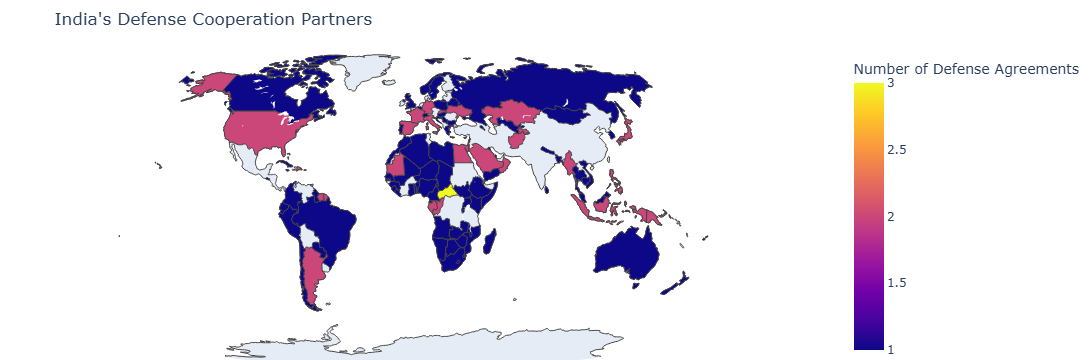

In [7]:
import pandas as pd
import pycountry
import plotly.express as px

# Load the cleaned CSV with official country names
df = pd.read_csv(r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv")

# Filter for Defense / Defence area entries
mask = df['Area of Cooperation'].str.lower().isin(['defense', 'defence'])
def_df = df[mask].copy()

# Map country names to ISO Alpha-3 codes
def to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

def_df['iso_alpha'] = def_df['Country_Clean'].apply(to_iso3)

# Aggregate counts per country
group = def_df.groupby(['Country_Clean', 'iso_alpha']) \
              .size().reset_index(name='count') \
              .dropna(subset=['iso_alpha'])

# Create choropleth map
fig = px.choropleth(
    group,
    locations='iso_alpha',
    color='count',
    color_continuous_scale=px.colors.sequential.Plasma,
    projection='natural earth',
    title="India's Defense Cooperation Partners",
    labels={'count': 'Number of Defense Agreements'}
)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()


In [9]:
import pandas as pd
import pycountry
import plotly.express as px

# Load cleaned data from the notebook environment
df = pd.read_csv(r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv")

# Filter to Defense entries and get unique countries
mask = df['Area of Cooperation'].str.lower().isin(['defense', 'defence'])
defense_countries = df[mask].drop_duplicates(subset='Country_Clean')

# Map country names to ISO-3 codes
def to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

defense_countries['iso_alpha3'] = defense_countries['Country_Clean'].apply(to_iso3)
defense_countries = defense_countries.dropna(subset=['iso_alpha3'])

# Add binary flag column
defense_countries['flag'] = 1

# Plot binary choropleth (world map)
fig = px.choropleth(
    defense_countries,
    locations='iso_alpha3',
    color='flag',
    color_continuous_scale=['lightgrey', 'steelblue'],
    range_color=(0, 1),
    scope='world',
    title="India's Defense Cooperation Partners (Presence Only)"
)
fig.update_traces(showscale=False)
output_path = "/mnt/data/defense_partners_map.html"
fig.write_html(output_path)
print(f"✅ Map saved to: {output_path}")


FileNotFoundError: [Errno 2] No such file or directory: '\\mnt\\data\\defense_partners_map.html'

In [10]:
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
# Use your exact path here; raw string to avoid unicode escape issues
DATA_CSV = r"C:/Users/Pooja/OneDrive/Desktop/tech paper india/india_tech_areas_with_countries_clean.csv"
OUTPUT_HTML = r"C:/Users/Pooja/OneDrive/Desktop/tech paper india/defense_partners_map.html"
# ────────────────────────────────────────────────────────────────────────────────

# 1. Load the cleaned data
df = pd.read_csv(DATA_CSV)

# 2. Filter for Defense/Defence agreements
mask = df['Area of Cooperation'].str.lower().isin(['defense', 'defence'])
def_countries = df[mask].drop_duplicates(subset='Country_Clean')

# 3. Map official country names to ISO-3 codes
def to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

def_countries['iso_alpha3'] = def_countries['Country_Clean'].apply(to_iso3)
def_countries = def_countries.dropna(subset=['iso_alpha3'])

# 4. Add a binary flag for presence-only mapping
def_countries['flag'] = 1

# 5. Create and save a binary choropleth map
fig = px.choropleth(
    def_countries,
    locations='iso_alpha3',
    color='flag',
    color_continuous_scale=['lightgrey', 'steelblue'],
    range_color=(0, 1),
    scope='world',
    title="India's Defense Cooperation Partners"
)
fig.update_traces(showscale=False)
fig.write_html(OUTPUT_HTML)

print(f"✅ Defense partners map saved to: {OUTPUT_HTML}")


✅ Defense partners map saved to: C:/Users/Pooja/OneDrive/Desktop/tech paper india/defense_partners_map.html


In [11]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
# Use a raw string to avoid unicode-escape issues
DATA_CSV    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_PNG  = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\defense_partners_map.png"
# ────────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Load the cleaned data
    df = pd.read_csv(DATA_CSV)

    # 2) Filter to only Defense/Defence
    mask = df['Area of Cooperation'].str.lower().isin(['defense', 'defence'])
    df_def = df[mask].drop_duplicates(subset='Country_Clean')

    # 3) Map country names to ISO-3 codes
    def to_iso3(name):
        try:
            return pycountry.countries.lookup(name).alpha_3
        except LookupError:
            return None

    df_def['iso_alpha3'] = df_def['Country_Clean'].apply(to_iso3)
    df_def = df_def.dropna(subset=['iso_alpha3'])

    # 4) Add a binary flag (presence only)
    df_def['flag'] = 1

    # 5) Create the choropleth
    fig = px.choropleth(
        df_def,
        locations='iso_alpha3',
        color='flag',
        color_continuous_scale=['lightgrey', 'steelblue'],
        range_color=(0, 1),
        scope='world',
        title="India’s Defense Cooperation Partners",
        labels={'flag': 'Has Defense Agreement'}
    )
    fig.update_traces(showscale=False)
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        geo=dict(showframe=False, showcoastlines=True)
    )

    # 6) Export to PNG (requires kaleido)
    #    pip install -U kaleido
    fig.write_image(OUTPUT_PNG, width=1200, height=600)
    print(f"✅ Map saved to: {OUTPUT_PNG}")

if __name__ == "__main__":
    main()


✅ Map saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\defense_partners_map.png


In [12]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
# Raw‐string Windows paths to avoid unicode‐escape errors
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_PNG = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\ai_partners_map.png"
# ────────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Load the cleaned data
    df = pd.read_csv(DATA_CSV)

    # 2) Filter to only Artificial Intelligence / AI agreements
    mask = df['Area of Cooperation'].str.lower().isin(['artificial intelligence', 'ai'])
    df_ai = df[mask].drop_duplicates(subset='Country_Clean')

    # 3) Map country names to ISO-3 codes
    def to_iso3(name):
        try:
            return pycountry.countries.lookup(name).alpha_3
        except LookupError:
            return None

    df_ai['iso_alpha3'] = df_ai['Country_Clean'].apply(to_iso3)
    df_ai = df_ai.dropna(subset=['iso_alpha3'])

    # 4) Add a binary flag for presence‐only plotting
    df_ai['flag'] = 1

    # 5) Create the choropleth
    fig = px.choropleth(
        df_ai,
        locations='iso_alpha3',
        color='flag',
        color_continuous_scale=['lightgrey', 'darkmagenta'],
        range_color=(0, 1),
        scope='world',
        title="India’s Artificial Intelligence Cooperation Partners",
        labels={'flag': 'Has AI Agreement'}
    )
    fig.update_traces(showscale=False)
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        geo=dict(showframe=False, showcoastlines=True)
    )

    # 6) Export to PNG (requires kaleido)
    #    pip install -U kaleido
    fig.write_image(OUTPUT_PNG, width=1200, height=600)
    print(f"✅ AI partners map saved to: {OUTPUT_PNG}")

if __name__ == "__main__":
    main()


✅ AI partners map saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\ai_partners_map.png


In [13]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_PNG = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\fintech_partners_map.png"
# ────────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Load the cleaned data
    df = pd.read_csv(DATA_CSV)

    # 2) Filter to only Fintech agreements
    mask = df['Area of Cooperation'].str.lower().isin(['fintech'])
    df_ft = df[mask].drop_duplicates(subset='Country_Clean')

    # 3) Map country names to ISO-3 codes
    def to_iso3(name):
        try:
            return pycountry.countries.lookup(name).alpha_3
        except LookupError:
            return None

    df_ft['iso_alpha3'] = df_ft['Country_Clean'].apply(to_iso3)
    df_ft = df_ft.dropna(subset=['iso_alpha3'])

    # 4) Add a binary flag for presence-only mapping
    df_ft['flag'] = 1

    # 5) Create the static choropleth map
    fig = px.choropleth(
        df_ft,
        locations='iso_alpha3',
        color='flag',
        color_continuous_scale=['lightgrey','teal'],
        range_color=(0,1),
        scope='world',
        title="India’s Fintech Cooperation Partners",
        labels={'flag':'Has Fintech Agreement'}
    )
    fig.update_traces(showscale=False)
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        geo=dict(showframe=False, showcoastlines=True)
    )

    # 6) Export to PNG (requires kaleido)
    fig.write_image(OUTPUT_PNG, width=1200, height=600)
    print(f"✅ Fintech partners map saved to: {OUTPUT_PNG}")

if __name__ == "__main__":
    main()


✅ Fintech partners map saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\fintech_partners_map.png


In [14]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_PNG = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\fintech_digital_payments_partners_map.png"
# ────────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Load the cleaned dataset
    df = pd.read_csv(DATA_CSV)

    # 2) Filter for Fintech and Digital Payments agreements
    mask = df['Area of Cooperation'].str.lower().isin(['fintech', 'digital payments'])
    df_sel = df[mask].drop_duplicates(subset='Country_Clean')

    # 3) Map country names to ISO-3 codes
    def to_iso3(name):
        try:
            return pycountry.countries.lookup(name).alpha_3
        except LookupError:
            return None

    df_sel['iso_alpha3'] = df_sel['Country_Clean'].apply(to_iso3)
    df_sel = df_sel.dropna(subset=['iso_alpha3'])

    # 4) Add a binary flag for presence-only mapping
    df_sel['flag'] = 1

    # 5) Create the choropleth map
    fig = px.choropleth(
        df_sel,
        locations='iso_alpha3',
        color='flag',
        color_continuous_scale=['lightgrey', 'darkgreen'],
        range_color=(0, 1),
        scope='world',
        title="India’s Fintech & Digital Payments Cooperation Partners",
        labels={'flag': 'Has Fintech or Digital Payments Agreement'}
    )
    fig.update_traces(showscale=False)
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        geo=dict(showframe=False, showcoastlines=True)
    )

    # 6) Export to PNG (requires kaleido)
    #    pip install -U kaleido
    fig.write_image(OUTPUT_PNG, width=1200, height=600)
    print(f"✅ Map saved to: {OUTPUT_PNG}")

if __name__ == "__main__":
    main()


✅ Map saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\fintech_digital_payments_partners_map.png


In [15]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_PNG = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\dpi_partners_map.png"
# ────────────────────────────────────────────────────────────────────────────────

def main():
    # 1) Load the cleaned data
    df = pd.read_csv(DATA_CSV)

    # 2) Filter to only Digital Public Infrastructure agreements
    mask = df['Area of Cooperation'].str.lower().isin(['digital public infrastructure'])
    df_dpi = df[mask].drop_duplicates(subset='Country_Clean')

    # 3) Map country names to ISO-3 codes
    def to_iso3(name):
        try:
            return pycountry.countries.lookup(name).alpha_3
        except LookupError:
            return None

    df_dpi['iso_alpha3'] = df_dpi['Country_Clean'].apply(to_iso3)
    df_dpi = df_dpi.dropna(subset=['iso_alpha3'])

    # 4) Add a binary flag (presence-only)
    df_dpi['flag'] = 1

    # 5) Create the choropleth
    fig = px.choropleth(
        df_dpi,
        locations='iso_alpha3',
        color='flag',
        color_continuous_scale=['lightgrey', 'darkgreen'],
        range_color=(0, 1),
        scope='world',
        title="India’s Digital Public Infrastructure Cooperation Partners",
        labels={'flag': 'Has DPI Agreement'}
    )
    fig.update_traces(showscale=False)
    fig.update_layout(
        margin=dict(l=0, r=0, t=40, b=0),
        geo=dict(showframe=False, showcoastlines=True)
    )

    # 6) Export to PNG (requires kaleido: pip install -U kaleido)
    fig.write_image(OUTPUT_PNG, width=1200, height=600)
    print(f"✅ DPI partners map saved to: {OUTPUT_PNG}")

if __name__ == "__main__":
    main()


✅ DPI partners map saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\dpi_partners_map.png


In [16]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_DIR  = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────

def to_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

def main():
    # 1) Load data
    df = pd.read_csv(DATA_CSV)

    # 2) Deduplicate country names (we only care presence)
    df = df.drop_duplicates(subset=["Country_Clean", "Area of Cooperation"])

    # 3) Pre-map all Country_Clean → ISO3 once
    iso_map = {
        name: to_iso3(name)
        for name in df["Country_Clean"].unique()
    }
    df["iso_alpha3"] = df["Country_Clean"].map(iso_map)
    df = df.dropna(subset=["iso_alpha3"])

    # 4) Loop over each area and generate map
    for area in df["Area of Cooperation"].unique():
        sub = df[df["Area of Cooperation"] == area]
        sub = sub.drop_duplicates(subset="Country_Clean")

        # binary flag for presence
        sub["flag"] = 1

        # build the figure
        fig = px.choropleth(
            sub,
            locations="iso_alpha3",
            color="flag",
            color_continuous_scale=["lightgrey", "crimson"],
            range_color=(0, 1),
            scope="world",
            title=f"India’s {area} Cooperation Partners",
            labels={"flag": f"Has {area} Agreement"}
        )
        fig.update_traces(showscale=False)
        fig.update_layout(
            margin=dict(l=0, r=0, t=40, b=0),
            geo=dict(showframe=False, showcoastlines=True)
        )

        # safe filename from area name
        fname = area.lower().replace(" ", "_").replace("&", "and")
        out_png = os.path.join(OUTPUT_DIR, f"{fname}_partners_map.png")

        # export to PNG
        fig.write_image(out_png, width=1200, height=600)
        print(f"✅ Saved map for {area} → {out_png}")

if __name__ == "__main__":
    # install with: pip install pandas pycountry plotly kaleido
    main()


✅ Saved map for Solar Alliance → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\solar_alliance_partners_map.png
✅ Saved map for Agriculture → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\agriculture_partners_map.png
✅ Saved map for Defence → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\defence_partners_map.png
✅ Saved map for Renewable Energy → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\renewable_energy_partners_map.png
✅ Saved map for Space → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\space_partners_map.png
✅ Saved map for Outer Space → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\outer_space_partners_map.png
✅ Saved map for Water → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\water_partners_map.png
✅ Saved map for Water Resources → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\water_resources_partners_map.png
✅ Saved map for Vaccines → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps\vaccines_partners_map.p

In [18]:
import os
import pandas as pd
import pycountry
import plotly.express as px

# ─── CONFIG ───────────────────────────────────────────────────────────────
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_DIR = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary"
MATRIX_CSV = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\presence_matrix.csv"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────

# 1) Load data
df = pd.read_csv(DATA_CSV)

# 2) Combine fintech & digital payments
df['Category'] = df['Area of Cooperation'].replace({
    'Digital Payments': 'Fintech & Digital Payments',
    'Fintech':         'Fintech & Digital Payments'
})

# 3) Build binary presence matrix
#    Rows: Country_Clean, Columns: Category, Values: 1 if present, else 0
presence = (
    pd.crosstab(df['Country_Clean'], df['Category'])
      .clip(upper=1)       # in case >1 agreements, cap to 1
      .reset_index()
)
presence.to_csv(MATRIX_CSV, index=False)
print(f"✅ Presence matrix saved to: {MATRIX_CSV}")

# 4) Pre-map every country to ISO3 once
iso_map = {}
for country in presence['Country_Clean']:
    try:
        iso_map[country] = pycountry.countries.lookup(country).alpha_3
    except LookupError:
        iso_map[country] = None

# 5) For each category, draw a presence-only map
for cat in [c for c in presence.columns if c != 'Country_Clean']:
    sub = presence[['Country_Clean', cat]].dropna()
    sub = sub[sub[cat] == 1].copy()
    sub['iso_alpha3'] = sub['Country_Clean'].map(iso_map)
    sub = sub.dropna(subset=['iso_alpha3'])

    fig = px.choropleth(
        sub,
        locations='iso_alpha3',
        color=cat,
        color_continuous_scale=['lightgrey', 'crimson'],
        range_color=(0,1),
        scope='world',
        title=f"India’s {cat} Cooperation Partners (Yes/No)",
    )
    fig.update_traces(showscale=False)
    fig.update_layout(margin=dict(l=0,r=0,t=40,b=0), geo=dict(showframe=False,showcoastlines=True))

    fname = cat.lower().replace(' ', '_').replace('&','and') + '_map.png'
    out_path = os.path.join(OUTPUT_DIR, fname)
    fig.write_image(out_path, width=1200, height=600)
    print(f"   • Saved map for {cat} → {out_path}")


✅ Presence matrix saved to: C:\Users\Pooja\OneDrive\Desktop\tech paper india\presence_matrix.csv
   • Saved map for 5G → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\5g_map.png
   • Saved map for 6G → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\6g_map.png
   • Saved map for AI → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\ai_map.png
   • Saved map for API → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\api_map.png
   • Saved map for Agriculture → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\agriculture_map.png
   • Saved map for Artificial Intelligence → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\artificial_intelligence_map.png
   • Saved map for Big Data → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\big_data_map.png
   • Saved map for Bio-energy → C:\Users\Pooja\OneDrive\Desktop\tech paper india\maps_binary\bio-energy_map.png
   • Saved map for Clean Tech → C:\Users\Pooj

In [19]:
import os
import re
import pdfplumber
import pandas as pd
import pycountry

# ─── CONFIG ───────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
OUTPUT_CSV = os.path.join(PDF_DIR, "india_outbound_investments.csv")
# ──────────────────────────────────────────────────────────────────────────

# 1) Refined investment‐keyword patterns (outbound investments only)
INVEST_KEYWORDS = [
    r"\bInvestment\b", r"\bInvestments\b",
    r"\bFDI\b", r"\bForeign\s+Direct\s+Investment\b",
    r"\bEquity\b", r"\bFund\b",
]
INV_PATTERNS = [re.compile(p, re.IGNORECASE) for p in INVEST_KEYWORDS]

# 2) Currency‐amount regex (USD, INR, EUR, GBP etc.)
CURRENCY_RE = re.compile(
    r"\b(?:US\$|\$|INR|USD|EUR|GBP)\s?[0-9\.,]+(?:\s?(?:million|billion|crore|lakh))?\b",
    re.IGNORECASE
)

# 3) UN country names for detection
COUNTRY_NAMES = set()
for country in pycountry.countries:
    COUNTRY_NAMES.add(country.name)
    if hasattr(country, "official_name"):
        COUNTRY_NAMES.add(country.official_name)
COUNTRY_NAMES |= {"Côte d'Ivoire", "DR Congo", "Republic of the Congo"}
COUNTRY_PATTERNS = [
    (name, re.compile(r"\b" + re.escape(name) + r"\b", re.IGNORECASE))
    for name in COUNTRY_NAMES
]

def detect_country(text, fallback_fname):
    best = ("Unknown", 0, len(text))
    for name, pat in COUNTRY_PATTERNS:
        matches = list(pat.finditer(text))
        if matches:
            cnt = len(matches)
            pos = matches[0].start()
            if cnt > best[1] or (cnt == best[1] and pos < best[2]):
                best = (name, cnt, pos)
    if best[1] > 0:
        return best[0]
    base = os.path.splitext(fallback_fname)[0]
    return re.sub(r"[\d_–-]+", " ", base).strip()

def extract_investments_from_pdf(path):
    try:
        with pdfplumber.open(path) as pdf:
            pages = [p.extract_text() or "" for p in pdf.pages]
    except:
        return []
    full_text = "\n".join(pages)
    country = detect_country(full_text, os.path.basename(path))
    paras = [p.strip() for p in re.split(r"\n{2,}", full_text) if p.strip()]
    rows = []
    for para in paras:
        if any(p.search(para) for p in INVEST_PATTERNS):
            amt = CURRENCY_RE.search(para)
            rows.append({
                "Country": country,
                "Paragraph": para.replace("\n", " "),
                "Amount": amt.group(0) if amt else ""
            })
    return rows

def main():
    all_rows = []
    for fname in sorted(os.listdir(PDF_DIR)):
        if not fname.lower().endswith(".pdf"):
            continue
        hits = extract_investments_from_pdf(os.path.join(PDF_DIR, fname))
        print(f"{fname} → {len(hits)} investment entries")
        all_rows.extend(hits)
    df = pd.DataFrame(all_rows, columns=["Country","Paragraph","Amount"])
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Extracted {len(df)} rows to:\n   {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


NameError: name 'INVEST_PATTERNS' is not defined

In [20]:
#!/usr/bin/env python3
import os
import re
import pdfplumber
import pandas as pd
import pycountry

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
OUTPUT_CSV = os.path.join(PDF_DIR, "india_outbound_investments.csv")
# ────────────────────────────────────────────────────────────────────────────────

# 1) Outbound‐investment keywords
INVEST_KEYWORDS = [
    r"\bInvestment\b", r"\bInvestments\b",
    r"\bFDI\b", r"\bForeign\s+Direct\s+Investment\b",
    r"\bEquity\b", r"\bFund\b"
]
INV_PATTERNS = [re.compile(p, re.IGNORECASE) for p in INVEST_KEYWORDS]

# 2) Directionality patterns
OUTBOUND_PAT = re.compile(
    r"\bIndia(?:n)?\b.*\b(?:Investment|FDI|Equity|Fund)s?\b",
    re.IGNORECASE
)
INBOUND_PAT = re.compile(
    r"\b(?:Investment|FDI|Equity|Fund)s?\b.*\b(?:in|into)\s+India\b",
    re.IGNORECASE
)

# 3) Currency‐amount regex
CURRENCY_RE = re.compile(
    r"\b(?:US\$|\$|INR|USD|EUR|GBP)\s?[0-9\.,]+(?:\s?(?:million|billion|crore|lakh))?\b",
    re.IGNORECASE
)

# 4) Build list of UN country‐name patterns
COUNTRY_NAMES = set()
for c in pycountry.countries:
    COUNTRY_NAMES.add(c.name)
    if hasattr(c, "official_name"):
        COUNTRY_NAMES.add(c.official_name)
# manual variants
COUNTRY_NAMES |= {"Côte d'Ivoire", "DR Congo", "Republic of the Congo"}
COUNTRY_PATTERNS = [
    (name, re.compile(r"\b" + re.escape(name) + r"\b", re.IGNORECASE))
    for name in COUNTRY_NAMES
]

def detect_country(text: str, filename: str) -> str:
    """
    Return the UN country name with the highest mention count in text;
    if none found, fall back to a cleaned filename.
    """
    best = ("Unknown", 0, len(text))
    for name, pat in COUNTRY_PATTERNS:
        matches = list(pat.finditer(text))
        if matches:
            cnt = len(matches)
            pos = matches[0].start()
            if cnt > best[1] or (cnt == best[1] and pos < best[2]):
                best = (name, cnt, pos)
    if best[1] > 0:
        return best[0]
    # fallback: strip digits and common words from filename
    base = os.path.splitext(filename)[0]
    clean = re.sub(r"[\d_–-]+|\b(bilateral|brief)\b", " ", base, flags=re.IGNORECASE)
    return clean.strip()

def extract_outbound_investments_from_pdf(path: str) -> list:
    """
    Read a PDF, detect partner country, then scan its paragraphs
    for outbound-investment mentions.
    """
    try:
        with pdfplumber.open(path) as pdf:
            pages = [p.extract_text() or "" for p in pdf.pages]
    except Exception:
        return []

    full_text = "\n".join(pages)
    country   = detect_country(full_text, os.path.basename(path))

    paras = [p.strip() for p in re.split(r"\n{2,}", full_text) if p.strip()]
    rows  = []
    for para in paras:
        # investment keyword?
        if not any(p.search(para) for p in INVEST_PATTERNS):
            continue
        # must be outbound: India before keyword
        if not OUTBOUND_PAT.search(para):
            continue
        # must not describe inbound FDI
        if INBOUND_PAT.search(para):
            continue
        # extract amount if present
        m = CURRENCY_RE.search(para)
        amount = m.group(0) if m else ""
        rows.append({
            "Country":   country,
            "Paragraph": para.replace("\n", " "),
            "Amount":    amount
        })
    return rows

def main():
    all_rows = []
    for fname in sorted(os.listdir(PDF_DIR)):
        if not fname.lower().endswith(".pdf"):
            continue
        path = os.path.join(PDF_DIR, fname)
        hits = extract_outbound_investments_from_pdf(path)
        print(f"{fname} → {len(hits)} outbound‐investment entries")
        all_rows.extend(hits)

    df = pd.DataFrame(all_rows, columns=["Country", "Paragraph", "Amount"])
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Extracted {len(df)} rows to:\n   {OUTPUT_CSV}")

if __name__ == "__main__":
    main()


NameError: name 'INVEST_PATTERNS' is not defined

In [1]:
import os
import pandas as pd
import networkx as nx

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_DIR = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────

# 1) Load data
df = pd.read_csv(DATA_CSV)

# 2) Build bipartite graph
B = nx.Graph()
# Nodes: Countries prefixed with "C_", Areas prefixed with "A_"
countries = df['Country_Clean'].unique()
areas = df['Category'].unique() if 'Category' in df.columns else df['Area of Cooperation'].unique()

for c in countries:
    B.add_node(f"C_{c}", bipartite='countries')
for a in areas:
    B.add_node(f"A_{a}", bipartite='areas')

# Edges: for each row, connect country to area
col = 'Category' if 'Category' in df.columns else 'Area of Cooperation'
for _, row in df.drop_duplicates(subset=['Country_Clean', col]).iterrows():
    B.add_edge(f"C_{row['Country_Clean']}", f"A_{row[col]}")

# 3) Compute degree centrality for areas (bipartite)
area_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']=='areas'}
country_nodes = set(B) - area_nodes

area_centrality = nx.algorithms.bipartite.degree_centrality(B, country_nodes)
# Filter to area nodes
area_centrality = {n: v for n, v in area_centrality.items() if n in area_nodes}

# 4) Compute betweenness centrality for countries
betweenness = nx.betweenness_centrality(B)
country_betweenness = {n: v for n, v in betweenness.items() if n in country_nodes}

# 5) Community detection on one-mode country projection
country_projection = nx.algorithms.bipartite.weighted_projected_graph(B, country_nodes)
communities = nx.algorithms.community.greedy_modularity_communities(country_projection)
# Map node to community id
comm_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        comm_map[node] = i

# 6) Save results
# Areas centrality
pd.DataFrame([
    {'Area': n.replace('A_', ''), 'DegreeCentrality': v}
    for n, v in area_centrality.items()
]).sort_values('DegreeCentrality', ascending=False
).to_csv(os.path.join(OUTPUT_DIR, 'area_degree_centrality.csv'), index=False)

# Country betweenness & community
pd.DataFrame([
    {'Country': n.replace('C_', ''), 
     'BetweennessCentrality': country_betweenness.get(n, 0),
     'Community': comm_map.get(n, -1)}
    for n in country_nodes
]).sort_values('BetweennessCentrality', ascending=False
).to_csv(os.path.join(OUTPUT_DIR, 'country_betweenness_communities.csv'), index=False)

# 7) Optional: save graph in GEXF for external visualization
nx.write_gexf(B, os.path.join(OUTPUT_DIR, 'india_science_diplomacy_bipartite.gexf'))

print("✅ Network metrics saved in:", OUTPUT_DIR)


✅ Network metrics saved in: C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis


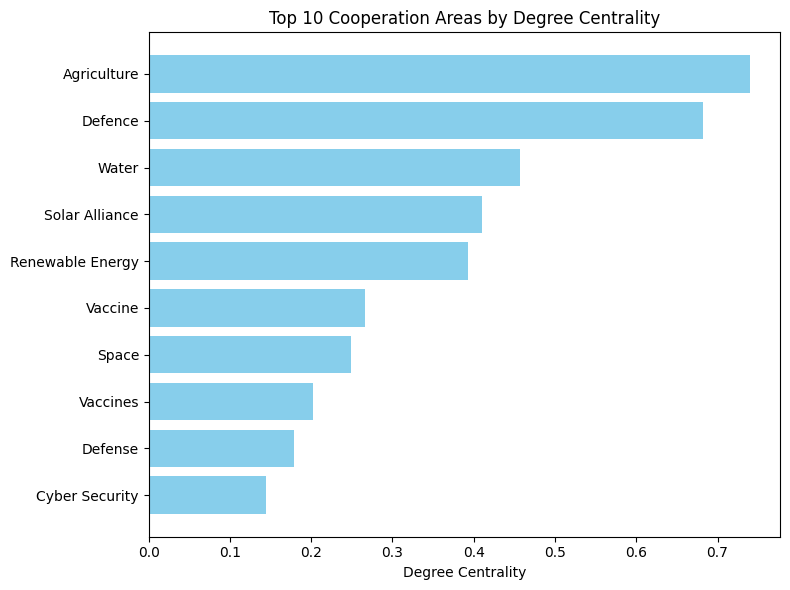

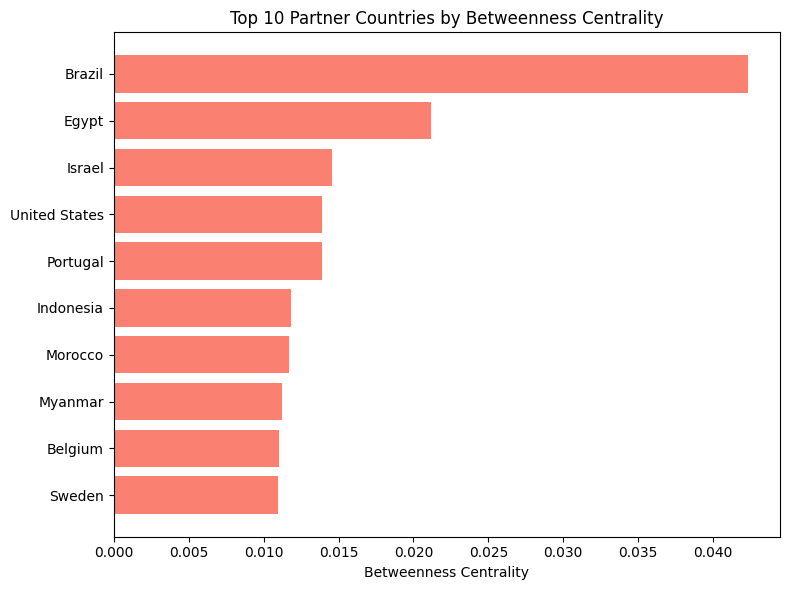

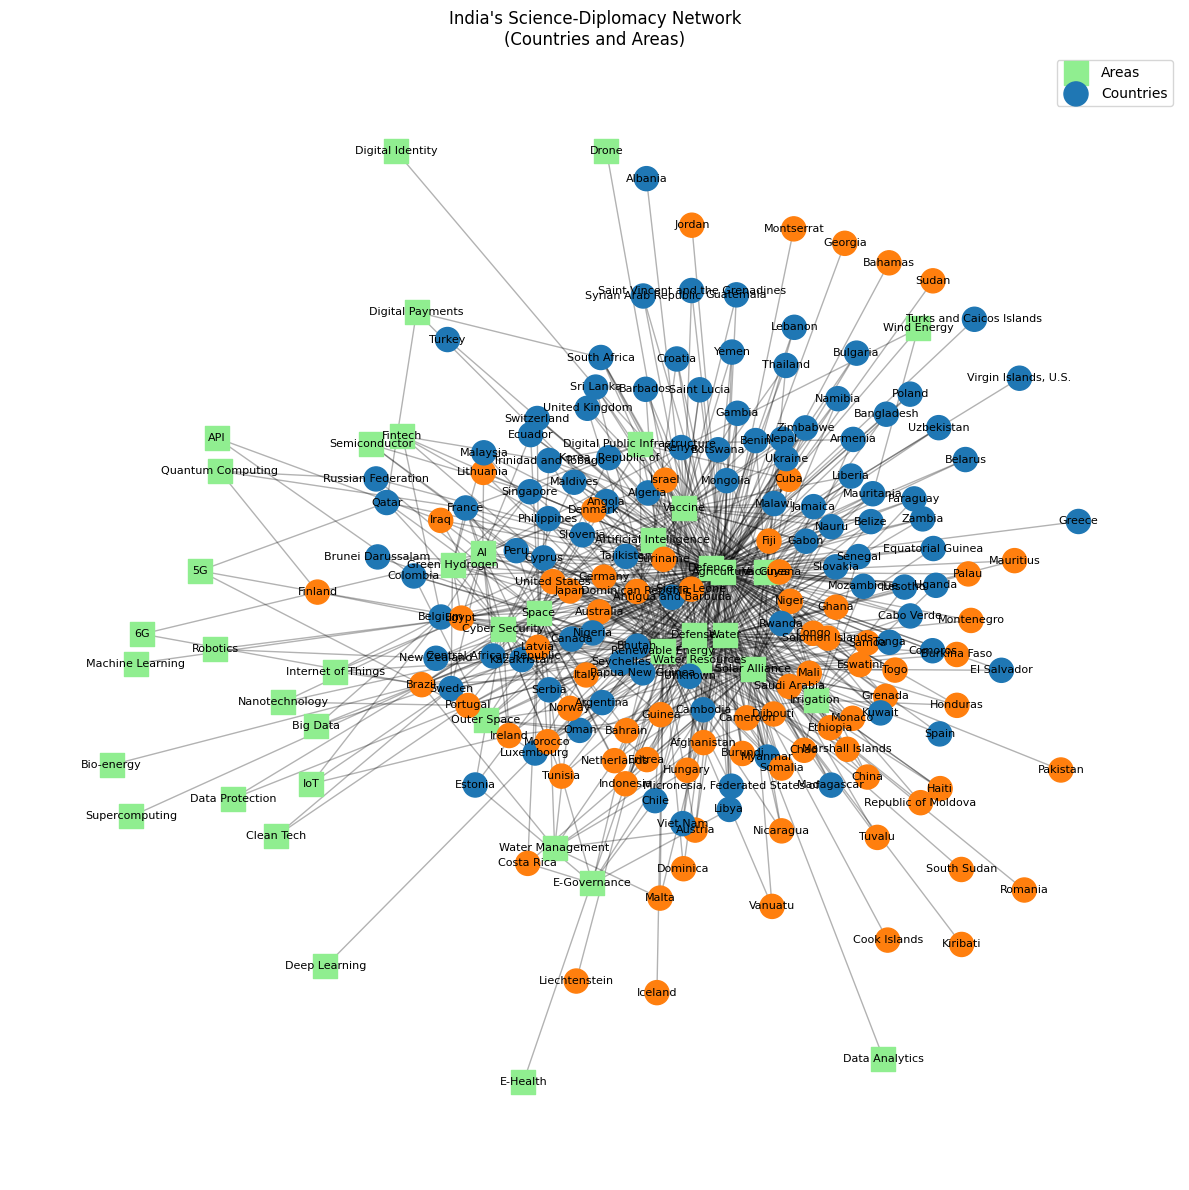

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import tab10

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
NETWORK_DIR = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis"  # Adjust if needed
# CSV paths
areas_csv = f"{NETWORK_DIR}/area_degree_centrality.csv"
countries_csv = f"{NETWORK_DIR}/country_betweenness_communities.csv"
gexf_path = f"{NETWORK_DIR}/india_science_diplomacy_bipartite.gexf"
# ────────────────────────────────────────────────────────────────────────────────

# 1) Load metrics
areas_df = pd.read_csv(areas_csv)
countries_df = pd.read_csv(countries_csv)

# 2) Bar chart: Top 10 Areas by Degree Centrality
areas_df_sorted = areas_df.sort_values('DegreeCentrality', ascending=False).head(10)
plt.figure(figsize=(8,6))
plt.barh(areas_df_sorted['Area'], areas_df_sorted['DegreeCentrality'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Cooperation Areas by Degree Centrality')
plt.xlabel('Degree Centrality')
plt.tight_layout()
plt.show()

# 3) Bar chart: Top 10 Countries by Betweenness Centrality
countries_df_sorted = countries_df.sort_values('BetweennessCentrality', ascending=False).head(10)
plt.figure(figsize=(8,6))
plt.barh(countries_df_sorted['Country'], countries_df_sorted['BetweennessCentrality'], color='salmon')
plt.gca().invert_yaxis()
plt.title('Top 10 Partner Countries by Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.tight_layout()
plt.show()

# 4) Network visualization with communities
G = nx.read_gexf(gexf_path)
# Extract community mapping
comm_map = dict(zip('C_' + countries_df['Country'], countries_df['Community']))

# Position nodes with spring layout
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12,12))
# Draw area nodes
area_nodes = [n for n, d in G.nodes(data=True) if d.get('bipartite') == 'areas']
nx.draw_networkx_nodes(
    G, pos,
    nodelist=area_nodes,
    node_shape='s',
    node_color='lightgreen',
    node_size=300,
    label='Areas'
)
# Draw country nodes with community colors
country_nodes = [n for n, d in G.nodes(data=True) if d.get('bipartite') == 'countries']
country_colors = [tab10(comm_map.get(node, 0) % 10) for node in country_nodes]
nx.draw_networkx_nodes(
    G, pos,
    nodelist=country_nodes,
    node_shape='o',
    node_color=country_colors,
    node_size=300,
    label='Countries'
)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.3)
# Labels
labels = {n: n.replace('A_', '').replace('C_', '') for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)
plt.legend(scatterpoints=1)
plt.axis('off')
plt.title("India's Science-Diplomacy Network\n(Countries and Areas)")
plt.tight_layout()
plt.show()


In [4]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
DATA_CSV   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\india_tech_areas_with_countries_clean.csv"
OUTPUT_DIR = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis_breakdown"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────

# 1) Load data and normalize the Category column
df = pd.read_csv(DATA_CSV)
col = 'Category' if 'Category' in df.columns else 'Area of Cooperation'
df['Category'] = df[col].replace({
    'Defence': 'Defense',
    'defence': 'Defense',
    'DEFENCE': 'Defense'
})

# 2) Build a bipartite graph
B = nx.Graph()
countries = df['Country_Clean'].unique()
areas = df['Category'].unique()

for c in countries:
    B.add_node(c, bipartite='countries')
for a in areas:
    B.add_node(a, bipartite='areas')
for _, row in df.drop_duplicates(subset=['Country_Clean', 'Category']).iterrows():
    B.add_edge(row['Country_Clean'], row['Category'])

# 3) Project to country network and detect communities
country_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 'countries']
country_proj = nx.algorithms.bipartite.weighted_projected_graph(B, country_nodes)
communities = list(nx.algorithms.community.greedy_modularity_communities(country_proj))
comm_map = {node: cid for cid, comm in enumerate(communities) for node in comm}

# 4) Visualize each community separately
for cid, comm in enumerate(communities):
    sub_countries = list(comm)
    # gather areas connected to these countries
    sub_areas = set()
    for country in sub_countries:
        sub_areas.update(B.neighbors(country))
    sub_nodes = sub_countries + list(sub_areas)
    SG = B.subgraph(sub_nodes).copy()

    # layout
    pos = nx.spring_layout(SG, seed=42)

    # plot
    plt.figure(figsize=(8, 6))
    nx.draw_networkx_nodes(SG, pos,
                           nodelist=sub_areas,
                           node_color='lightgreen',
                           node_shape='s',
                           node_size=300,
                           label='Areas')
    nx.draw_networkx_nodes(SG, pos,
                           nodelist=sub_countries,
                           node_color='skyblue',
                           node_shape='o',
                           node_size=300,
                           label='Countries')
    nx.draw_networkx_edges(SG, pos, alpha=0.5)
    labels = {n: n for n in sub_nodes}
    nx.draw_networkx_labels(SG, pos, labels, font_size=8)

    plt.title(f"Community {cid} Network")
    plt.legend(scatterpoints=1)
    plt.axis('off')
    plt.tight_layout()
    out_path = os.path.join(OUTPUT_DIR, f"community_{cid}.png")
    plt.savefig(out_path)
    plt.close()
    print(f"Saved community {cid} network to {out_path}")


Saved community 0 network to C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis_breakdown\community_0.png
Saved community 1 network to C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_analysis_breakdown\community_1.png


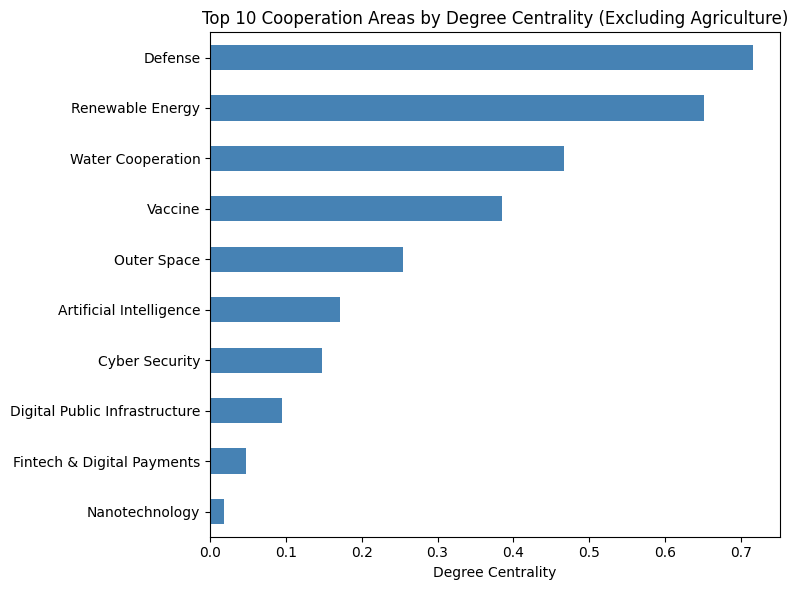

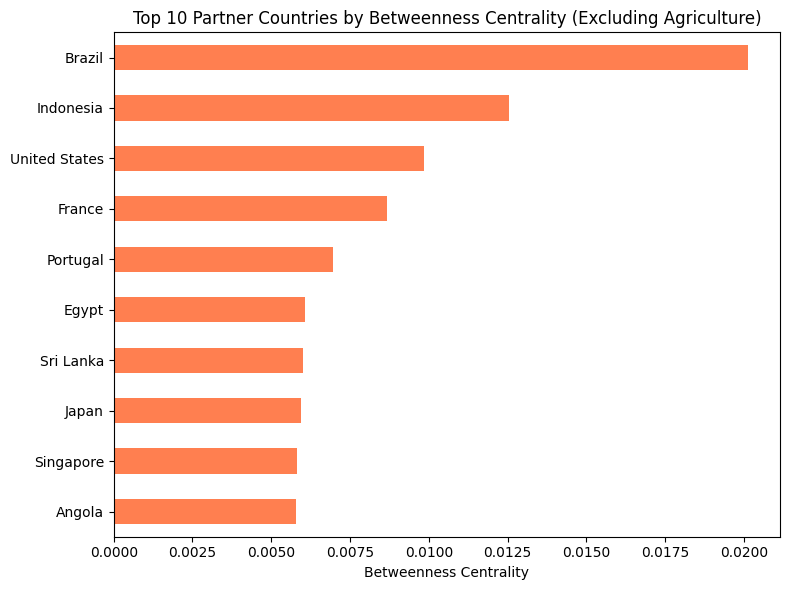

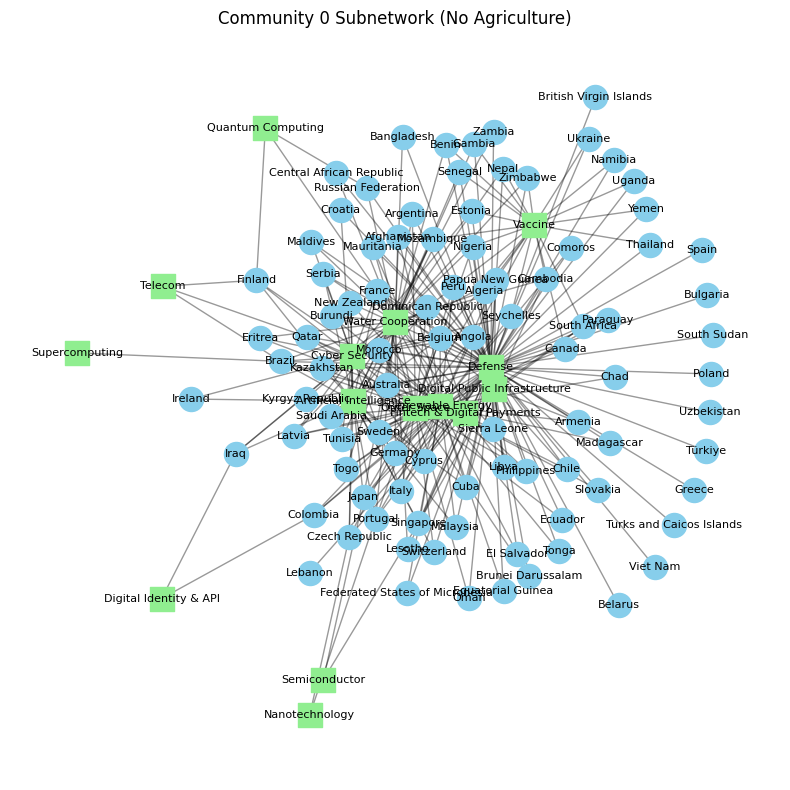

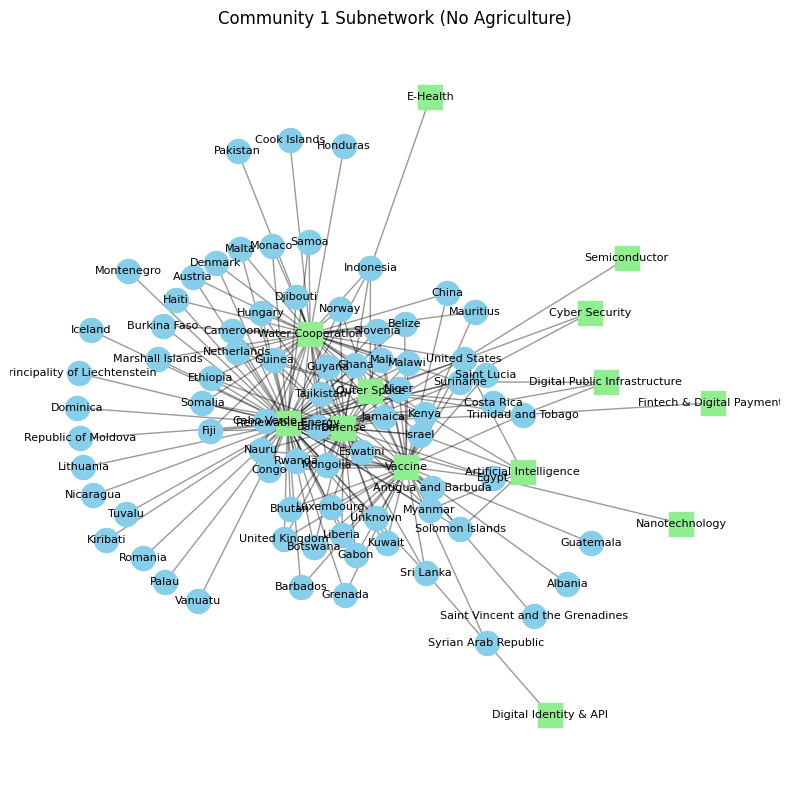

In [5]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite, community

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
# Path to your normalized CSV (using raw string for Windows paths)
CSV_PATH   = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\main file.csv"
OUTPUT_DIR = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india\network_viz_no_agri"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ────────────────────────────────────────────────────────────────────────────────

# 1) Load normalized data and exclude Agriculture
df = pd.read_csv(CSV_PATH)
df = df[df['Area_Normalized'] != 'Agriculture'].copy()

# 2) Build bipartite graph
B = nx.Graph()
pairs = df[['Country', 'Area_Normalized']].drop_duplicates()
countries = pairs['Country'].unique().tolist()
areas = pairs['Area_Normalized'].unique().tolist()

B.add_nodes_from(countries, bipartite='countries')
B.add_nodes_from(areas, bipartite='areas')
for _, row in pairs.iterrows():
    B.add_edge(row['Country'], row['Area_Normalized'])

# 3) Degree centrality for areas
area_cen = bipartite.degree_centrality(B, countries)
area_cen = {n: v for n, v in area_cen.items() if n in areas}
area_series = pd.Series(area_cen).sort_values(ascending=False)

# Plot top 10 areas by degree centrality (no Agriculture)
plt.figure(figsize=(8,6))
area_series.head(10).plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Cooperation Areas by Degree Centrality (Excluding Agriculture)")
plt.xlabel("Degree Centrality")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "top_areas_degree_centrality_no_agri.png"))
plt.show()

# 4) Betweenness centrality for countries
bet = nx.betweenness_centrality(B)
bet_series = pd.Series({n: v for n, v in bet.items() if n in countries}).sort_values(ascending=False)

# Plot top 10 countries by betweenness centrality (no Agriculture)
plt.figure(figsize=(8,6))
bet_series.head(10).plot(kind='barh', color='coral')
plt.gca().invert_yaxis()
plt.title("Top 10 Partner Countries by Betweenness Centrality (Excluding Agriculture)")
plt.xlabel("Betweenness Centrality")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "top_countries_betweenness_no_agri.png"))
plt.show()

# 5) Community detection on country projection
country_proj = bipartite.weighted_projected_graph(B, countries)
communities = list(community.greedy_modularity_communities(country_proj))

# Visualize first 3 community subnetworks (excluding Agriculture)
for idx, comm in enumerate(communities[:3]):
    sub_countries = list(comm)
    sub_areas = {a for c in sub_countries for a in B.neighbors(c)}
    SG = B.subgraph(sub_countries + list(sub_areas))
    pos = nx.spring_layout(SG, seed=42)

    plt.figure(figsize=(8,8))
    nx.draw_networkx_nodes(SG, pos,
                           nodelist=list(sub_areas),
                           node_shape='s',
                           node_color='lightgreen',
                           label='Areas')
    nx.draw_networkx_nodes(SG, pos,
                           nodelist=sub_countries,
                           node_shape='o',
                           node_color='skyblue',
                           label='Countries')
    nx.draw_networkx_edges(SG, pos, alpha=0.4)
    nx.draw_networkx_labels(SG, pos, {n: n for n in SG.nodes()}, font_size=8)
    plt.title(f"Community {idx} Subnetwork (No Agriculture)")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"community_{idx}_no_agri.png"))
    plt.show()


In [6]:
import os
import re
import pdfplumber
import pandas as pd

# ─── CONFIGURATION ─────────────────────────────────────────────────────────────
PDF_DIR    = r"C:\Users\Pooja\OneDrive\Desktop\tech paper india"
RAW_CSV    = os.path.join(PDF_DIR, "india_tech_raw_areas.csv")
FINAL_CSV  = os.path.join(PDF_DIR, "india_tech_areas_normalized.csv")
# ────────────────────────────────────────────────────────────────────────────────

# 1) Extraction keywords (added "nuclear")
AREA_KEYWORDS = [
    "Digital Public Infrastructure", "Digital Identity", "Digital Payments",
    "E-Governance", "E-Health", "E-Education", "E-Commerce",
    "Cloud Computing", "Edge Computing", "Data Analytics", "Big Data",
    "Artificial Intelligence", "AI", "Machine Learning", "Deep Learning",
    "Neural Network", "Computer Vision", "Natural Language Processing",
    "Robotics", "Autonomous Vehicle", "Drone", "UAV", "Internet of Things", "IoT",
    "5G", "6G", "Quantum Computing", "Quantum Communication",
    "Blockchain", "Distributed Ledger", "Fintech", "API", "Digital Twin",
    "Smart Contract", "Clean Tech", "Green Hydrogen", "Renewable Energy",
    "Wind Energy", "Solar Alliance", "Bio-energy", "3D Printing",
    "Semiconductor", "Nanotechnology", "Photonics", "Supercomputing",
    "Augmented Reality", "Virtual Reality", "Mixed Reality",
    "Cyber Security", "Data Protection", "Space", "Outer Space",
    "Agriculture", "Agri-technology", "Water", "Water Resources",
    "Water Management", "Irrigation", "Vaccine", "Vaccines",
    "Defense", "Defence",
    # New keyword for nuclear cooperation
    "Nuclear"
]
AREA_PATTERNS = [
    re.compile(r"\b" + kw.replace(" ", r"\s+") + r"\b", re.IGNORECASE)
    for kw in AREA_KEYWORDS
]

# 2) Country extraction (from title or fallback)
def extract_country(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = pdf.pages[0].extract_text() or ""
    m = re.search(r"India\s*[–-]\s*([A-Za-z &\(\)]+)", text)
    if m:
        return m.group(1).strip()
    return os.path.splitext(os.path.basename(pdf_path))[0]

# 3) Raw extraction loop
rows = []
for fname in os.listdir(PDF_DIR):
    if not fname.lower().endswith(".pdf"):
        continue
    path = os.path.join(PDF_DIR, fname)
    country = extract_country(path)
    with pdfplumber.open(path) as pdf:
        full = "\n".join(page.extract_text() or "" for page in pdf.pages)
    for para in re.split(r"\n{2,}", full):
        for pat, kw in zip(AREA_PATTERNS, AREA_KEYWORDS):
            if pat.search(para):
                rows.append({"Country": country, "Area_Raw": kw})
                
df_raw = pd.DataFrame(rows).drop_duplicates()
df_raw.to_csv(RAW_CSV, index=False)

# 4) Normalization mapping
mapping = {
    # Telecom
    **{k: "Telecom" for k in ["5G", "6G"]},
    # AI cluster
    **{k: "Artificial Intelligence" for k in [
        "Artificial Intelligence", "AI", "Big Data", "Data Analytics",
        "Deep Learning", "Neural Network", "Computer Vision",
        "Natural Language Processing", "Robotics", "Drone",
        "Autonomous Vehicle", "Internet of Things", "Machine Learning",
        "Cyber Security", "Data Protection"
    ]},
    # Renewable energy
    **{k: "Renewable Energy" for k in [
        "Clean Tech", "Wind Energy", "Solar Alliance", "Bio-energy", "Green Hydrogen"
    ]},
    # Fintech cluster
    "Fintech": "Fintech & Digital Payments",
    "Digital Payments": "Fintech & Digital Payments",
    # Digital identity/API
    "Digital Identity": "Digital Identity & API",
    "API": "Digital Identity & API",
    # DPI cluster
    "Digital Public Infrastructure": "Digital Public Infrastructure",
    "E-Governance": "Digital Public Infrastructure",
    # Space
    "Space": "Outer Space",
    "Outer Space": "Outer Space",
    # Water
    **{k: "Water Cooperation" for k in ["Water","Water Resources","Water Management","Irrigation"]},
    # Vaccines
    **{k: "Vaccine" for k in ["Vaccine","Vaccines"]},
    # Defense
    **{k: "Defense" for k in ["Defense","Defence"]},
    # Agriculture
    **{k: "Agriculture" for k in ["Agriculture","Agri-technology"]},
    # Nuclear
    "Nuclear": "Nuclear Cooperation"
}

# 5) Apply normalization
df_raw['Area_Normalized'] = df_raw['Area_Raw'].map(mapping).fillna(df_raw['Area_Raw'])
df_raw.to_csv(FINAL_CSV, index=False)

# Preview
import numpy as np
preview = df_raw[['Area_Raw','Area_Normalized']].drop_duplicates().reset_index(drop=True)
display(preview.head(20))


,Area_Raw,Area_Normalized
0,Solar Alliance,Renewable Energy
1,Agriculture,Agriculture
2,Defence,Defense
3,Renewable Energy,Renewable Energy
4,Space,Outer Space
5,Outer Space,Outer Space
6,Water,Water Cooperation
7,Water Resources,Water Cooperation
8,Vaccines,Vaccine
9,Defense,Defense
